# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science


## Final Project Group 42:  Trump's Tweets


**Harvard University**<br/>
**Fall 2019**<br/>
**Group Members**: Gonzalo Jara, Chris N. Kranzinger, Jordan Turley<br/>


<hr style="height:2pt">


## Structure of the Project and Milestones

**1. Fri, October 4: Group Creation and Project Selection (2 points)**

Make a group for your team (3 - 4 students) by choosing from pre-made Canvas Groups
labeled ’Final Project #’, and select your team’s 1st, 2nd, and 3rd choice for a project topic
in the ’Final Project - Milestone 1’ assignment on Canvas. All team members should enter
the group before submitting and only one member of your group should submit. If you do
not have a group you still need to submit your preferred project topics individually in this
Canvas assignment, and we will assign you to a team.

**2. Fri, October 25: Scope of Work and Preliminary EDA (3 points)**

Submit the Scope of Work form on Canvas in the ’Final Project - Milestone 2’ assignment.
The Scope of Work form will prompt you for the following information:
* Project statement. The project goal in the posted project description is not fully formulated or tuned. Based on the project description and references, state a well-defined
question that you’ll address in the project.
* Preliminary EDA. Explain your plans for preliminary data exploration. Please take
care when specifying your plans, so that team members can work individually on
these tasks if need be.

    
**3. Wed, November 20: EDA and Revised Project Statement (15 points)**

On Canvas in the ’Final Project - Milestone 2’ assignment, submit a 2 - 3 page revised project
statement and EDA (can be created using Latex, word processing software, etc.) and an
accompanying Jupyter notebook (that was used to create the visuals). Your 2 - 3 page
submission should include:
* A description of the data: what type of data are you dealing with? What methods have
you used to explore the data (initial explorations, data cleaning and reconciliation, etc)?
* Visualizations and captions that summarize the noteworthy findings of the EDA.
* A revised project question based on the insights you gained through EDA.
* A baseline model.


**4. Wed, December 11: Project due (80 points)**

Submit your final project on Canvas in the ’Final Project - Final Submission’ assignment.
You are required to submit the following:
* Jupyter notebook with relevant code (30 points),
* A link to the report presented on a website (45 points = 40 points content + 5 points
for style), and
* A peer evaluation of each team member (5 points) in a separate Canvas quiz (submitted
individually).


## Deliverable: Jupyter notebook with relevant code 

In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# Libraries
import random
random.seed(112358)


# Data and Stats packages
import numpy as np
import pandas as pd
pd.set_option('max_columns', 200)

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#Datetime
import ciso8601
import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from textblob import TextBlob

import statsmodels.api as sm

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.metrics import r2_score

# Overview and EDA

### 1. Problem Statement

There is no doubt that social networks have experienced phenomenal growth in the last 20 years. Facebook, Twitter, Instagram and many others have been the protagonists of one of the biggest technological revolutions. These platforms are used in everyday situations, from coordinating a dinner with friends, to even doing world politics. There are many examples that shows this diversity of uses and impacts. Elon Musk's tweets sharing their future plans for their companies generated an instant change on the stocks, or Donald Trump's tweets declaring his support to Venezuela's self-proclaimed President, Juan Guaido. In this context, it is of special interest to research how very influential public figures, such as President Donald Trump, frame their tweets, which emotions they display in them and what impact this creates on the world around them.

In this project we first determined the emotional load of President Donald Trump's tweets, measured as subjectivity and polarization, and use this to subsequently predict the number of "favorites" an individual tweet will get, as well as how the emotional load, measured in subjectivity and polarization of tweets, will impact the daily change in followers.

<hr style='height:2pt'>

### 2. Exploratory Data Analysis

#### 2.1 Dataset

For this project we analyzed different sources to get the data from:

- 1. Twitter API
- 2. Scrapping
- 3. Trump's Tweets Archive: http://www.trumptwitterarchive.com/archive

First of all, we discarded Scrapping as the Twitter API could give us the same information and is more straightforward to use.

Between the Twitter API and Trump's Tweets Archive ('Archive') we decided to use Trump's Tweets Archive for several reasons:
- The 'Archive' dataset contained all the relevant information we needed for making our analysis. 
- The 'Archive' dataset was already tested.
- We can surf the webpage to look for specific tweets in case we encountered any error or have any doubt. The visualization and filter system are really helpful for this task.
- As we are analysing around 45k observations, it is still a manageable number to look them in Excel or other data visualization software.
- It is faster to implement.
- If, for any reason, we realized that we need more data for our analysis, we can still use the Twitter's API.


##### 2.1.1 How does the 'Archive' dataset works?

To download the data you:
1. Go to http://www.trumptwitterarchive.com/archive
2. Select from when to when do you want your data
3. Select from what device (source) you want to look the tweets
4. In Options you select what information/variables do you want to export.
5. You select an export method: .csv or .json


##### 2.1.2 What data did we export?

We export every tweet and retweet made by Trump from 2012 to November 14th. We include the following variables from every observation.
1. `source` (object): from where did he tweeted the tweet. 
2. `text`(object): The tweet's text.
3. `created_at`(dtetime64): datetime when he tweeted the tweet.
4. `retweet_count`(int64): amount of retweets the tweet has.
5. `favorite_count`(int64): amount of favs the tweet has. Only valid for original tweets (no retweeted tweets by Trump).
6. `is_retweet` (bool): True if the tweet is retweeted tweet, False otherwise.
7. `id_str` (int64): Tweet's unique ID.

##### 2.1.3 What things did wedo before importing the dataset?

Before importing the dataset to the jupyter notebook we did a fast check on Microsoft Excel. We encountered one thing that needed our attention:

- 53 observations didn't have data in `id_str`

To solve this, we filtered the 53 observations and realized that all of them had the `id_str`in the `is_retweet` columnd. We moved the data to the correct column and we analyzed whether the observations were retweeted tweets or orignal tweets.
As all of them had 0 in `retweet_count` AND all their texts started with "RT @", we realized all those tweets corresponded to retweeted tweets. Therefore, we set "True" in `is_retweet` column for all the observations.



<hr style='height:2pt'>


#### 2.2 Exploratory Data Analysis including Data Cleaning and initial Feature Engineering

In [4]:
tweets_df = pd.read_excel("data/2012-2019.xlsx")

In [5]:
display(tweets_df.head()) # Look to see that everything is ok
display(tweets_df.shape) # How many observations we have
display(tweets_df.count())
display(tweets_df.dtypes)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,"Wow! Was just told that my son’s book, “Trigge...",2019-11-14 03:47:12,23179,137637,False,1194824072011689984
1,Twitter for iPhone,RT @Scavino45: After the call - Ambassador Tay...,2019-11-14 03:39:06,8282,0,True,1194822034037050112
2,Twitter for iPhone,RT @Jim_Jordan: Mr. Kent affirmed Ukraine has ...,2019-11-14 03:38:51,16559,0,True,1194821973710419968
3,Twitter for iPhone,RT @Jim_Jordan: https://t.co/zODJMgmP5F,2019-11-14 03:38:35,12576,0,True,1194821905431379968
4,Twitter for iPhone,RT @Scavino45: Moments ago.... https://t.co/XI...,2019-11-14 03:38:13,5148,0,True,1194821812884039936


(41563, 7)

source            41563
text              41563
created_at        41563
retweet_count     41563
favorite_count    41563
is_retweet        41563
id_str            41563
dtype: int64

source                    object
text                      object
created_at        datetime64[ns]
retweet_count              int64
favorite_count             int64
is_retweet                  bool
id_str                     int64
dtype: object

*EDA Analysis*

- We have 41,563 tweets and seven characteristics/variables.

- Every tweet has data in every variables.

- We have variables as objects, datetime64, int64, and bool. 

- It would be interesting to see how to work with the datetime64 variable, as it will be one of the most important variables to analyze the tweets.

- It seems that tweets that are retweets always start with "RT @"

- Retweets don't have a favourite_count number. They are filled with zeros.

##### 2.2.1. Create 'president' variable to look at data since he was elected.

In [6]:
tweets_df['president'] = tweets_df.apply(lambda x: 1 if x['created_at']> ciso8601.parse_datetime("2016-11-09") else 0, axis=1)
#display(tweets_df[(tweets_df['created_at']>"2016-11-07") & (tweets_df['created_at']<"2016-11-10")].head()) # Check
tweets_president_df = tweets_df[tweets_df["president"]==1].copy()

*EDA Analysis*

- We decided to analyze tweets since Trump was elected president.

- To do so, we created a bool variable 'president' on which we set 1 = Trump is president, 0 = Trump hasn't been elected yet.

- We kept the other tweets as baseline in case we need them.

##### 2.2.2 Analyze Tweets Counts

In [7]:
#Manage DateTime
#https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/
tweets_president_df['created_at_hour'] = tweets_president_df.apply(lambda x: x['created_at'].strftime('%H'), axis=1)
tweets_president_df['created_at_date'] = tweets_president_df.apply(lambda x: x['created_at'].strftime('%D'), axis=1)
tweets_president_df['created_at_month'] = tweets_president_df.apply(lambda x: x['created_at'].strftime('%m'), axis=1)
tweets_president_df['created_at_year'] = tweets_president_df.apply(lambda x: x['created_at'].strftime('%Y'), axis=1)
tweets_president_df['created_at_month_year'] = tweets_president_df.apply(lambda x: x['created_at'].strftime('%Y-%m'), axis=1)

*EDA Analysis*

- Even though we could have got the hour, date, month, year, and month_year every time we needed them, this would have made the code hard to read. For that reason, we created new variables for these parameters.


###### 2.2.2.1 Analyze Tweets Counts per Hour

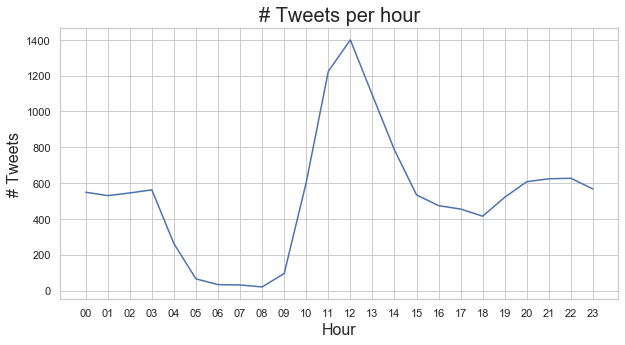

In [12]:
# Get Plots
#tweets_president_df.groupby([tweets_president_df['created_at'].dt.date])['created_at'].count() #Other option
xhours = tweets_president_df.groupby([tweets_president_df['created_at_hour']])['created_at_hour'].count()

sns.set_style("whitegrid")
plt.figure(figsize = (10,5))
plt.ylabel("# Tweets", fontsize = 16)
plt.xlabel("Hour", fontsize = 16)
plt.title('# Tweets per hour', fontsize = 20)
plt.plot(list (xhours.index), list(xhours))
#plt.legend(fontsize = 13)
plt.show();

*EDA Analysis*

- We can observe from the graph that Trump tweets mostly between 10am to 2pm.

- It is interesting the high frequency of tweets at night (around 3 am).

- For the graph we can infere that between 5 and 9am he is doing other things, most likely sleeping.



###### 2.2.2.2 Analyze Tweets Counts per year

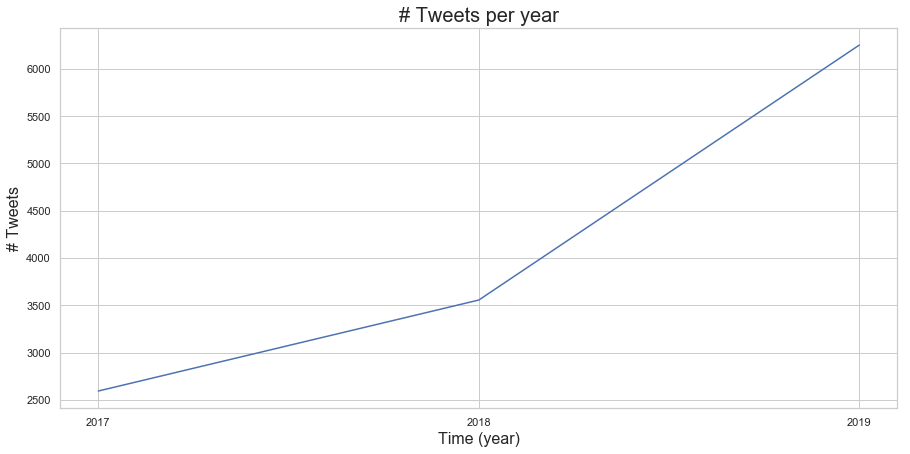

In [8]:
xyears = tweets_president_df.groupby([tweets_president_df['created_at_year']])['created_at_year'].count()

plt.figure(figsize = (15,7))
plt.ylabel("# Tweets", fontsize = 16)
plt.xlabel("Time (year)", fontsize = 16)
plt.title('# Tweets per year', fontsize = 20)
plt.plot(list (xyears.index[1:]), list(xyears[1:])) #We take out 2016 as only includes two months.
#plt.legend(fontsize = 13)
plt.show();

*EDA Analysis*

- We consider his tweets from 2017 onwards, as he was elected president in November of 2016. 

- It's really interesting how the frecuency he tweets has almost doubled from 2018 to 2019 (if we take into account that we still have one month and half in 2019). 

###### 2.2.2.3 Analyze Tweets Counts per Month-Year

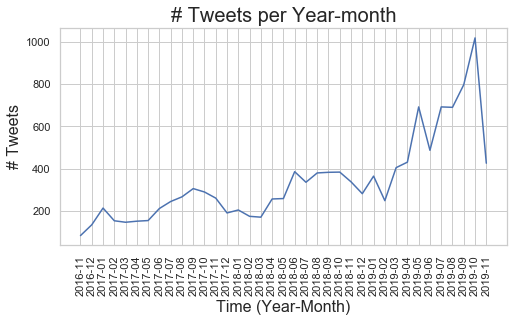

In [15]:
xmonth_year = tweets_president_df.groupby([tweets_president_df['created_at_month_year']])['created_at_month_year'].count()
plt.figure(figsize = (8,4))
plt.ylabel("# Tweets", fontsize = 16)
plt.xlabel("Time (Year-Month)", fontsize = 16)
plt.xticks(rotation='vertical')
plt.title('# Tweets per Year-month', fontsize = 20)
plt.plot(list (xmonth_year.index), list(xmonth_year) )#We take out 2016 as only includes two months.
#plt.legend(fontsize = 13)
plt.show();

*EDA Analysis*

- This graph builds upon the last one.

- In October, 2019, he reached his peak of tweets.

- We shouldn't consider November 2019, as the month hasn't ended yet. That said, November is a great candidate to surpass the record.

##### 2.2.3 Analyze Tweets Retweets

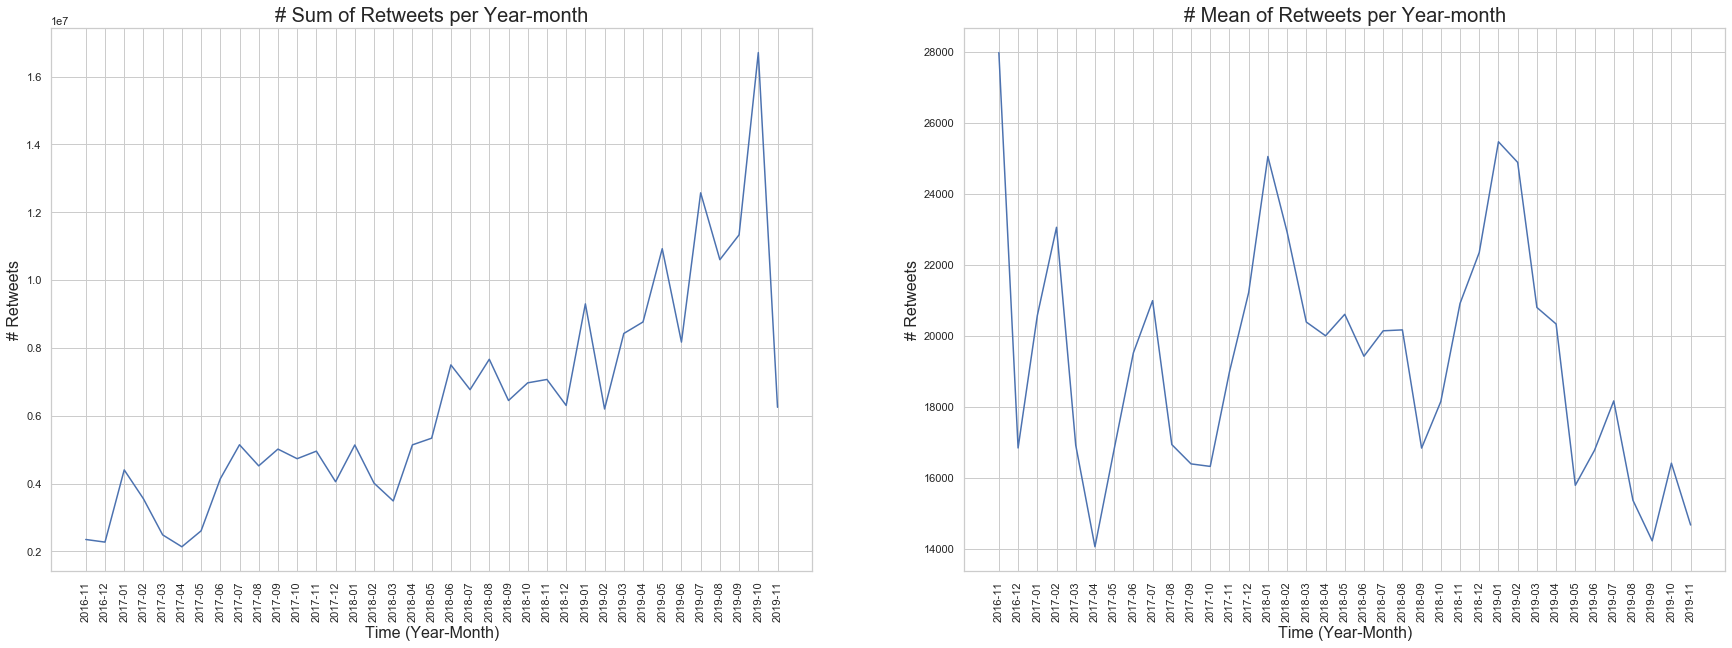

In [19]:
x_retweetcount = tweets_president_df.groupby([tweets_president_df['created_at_month_year']])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
#ax = ax.ravel()
ax1.set_ylabel("# Retweets", fontsize = 16)
ax1.set_xlabel("Time (Year-Month)", fontsize = 16)
ax1.set_xticklabels(labels=x_retweetcount.sum().index, rotation='vertical')
ax1.set_title('# Sum of Retweets per Year-month', fontsize = 20)
ax1.plot(list (x_retweetcount.sum().index), list(x_retweetcount.sum()["retweet_count"]) )
#ax1.legend(fontsize = 13)


ax2.set_ylabel("# Retweets", fontsize = 16)
ax2.set_xlabel("Time (Year-Month)", fontsize = 16)
ax2.set_xticklabels(labels=x_retweetcount.mean().index, rotation='vertical')
ax2.set_title('# Mean of Retweets per Year-month', fontsize = 20)
ax2.plot(list (x_retweetcount.mean().index), list(x_retweetcount.mean()["retweet_count"]) )
#ax2.legend(fontsize = 13)
plt.show();

##### 2.2.4 Analyze Tweets Fav

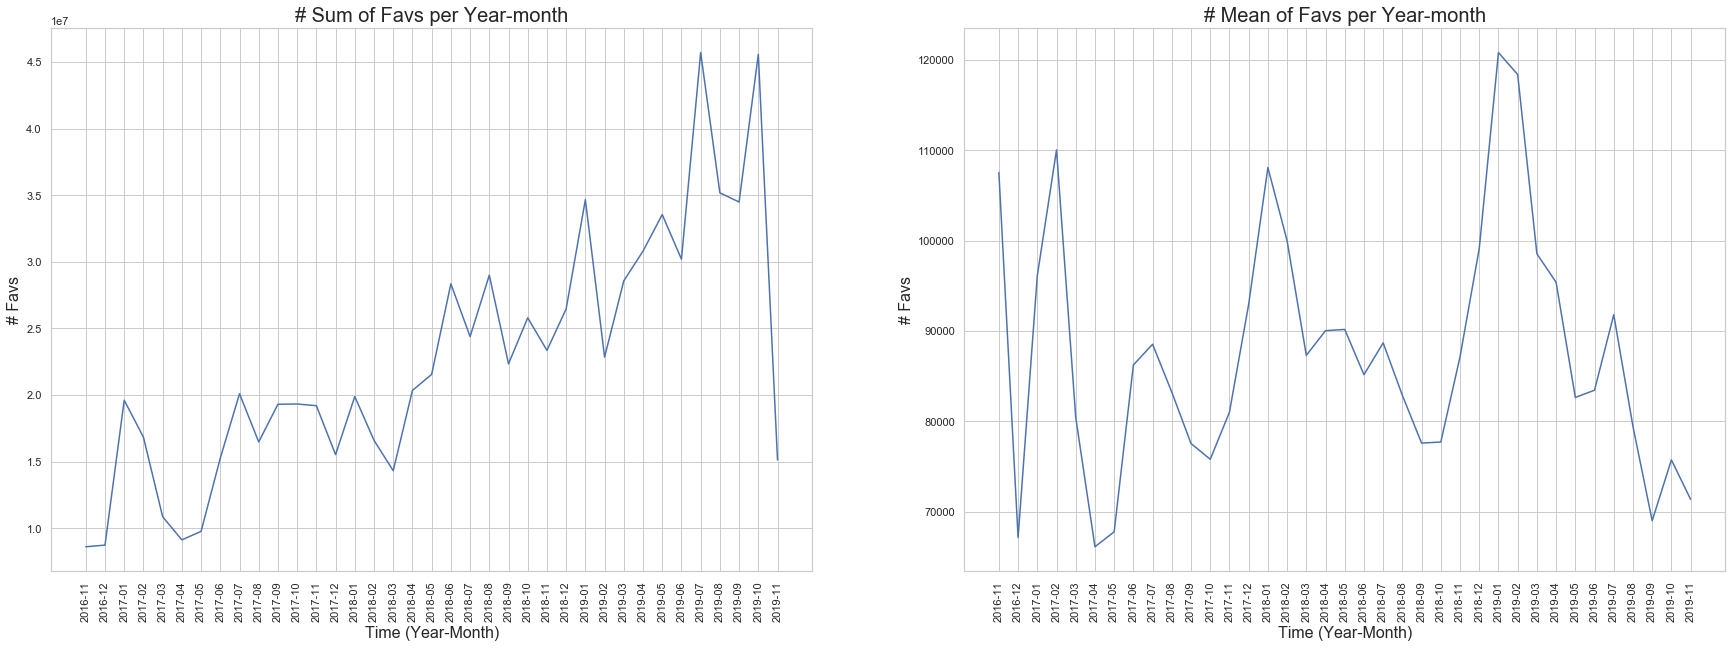

In [17]:
#1. Only consider observations no-retweets

x_favcount = tweets_president_df[tweets_president_df['is_retweet']==False].groupby([tweets_president_df['created_at_month_year']])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,10))
#ax = ax.ravel()
ax1.set_ylabel("# Favs", fontsize = 16)
ax1.set_xlabel("Time (Year-Month)", fontsize = 16)
ax1.set_xticklabels(labels=x_favcount.sum().index, rotation='vertical')
ax1.set_title('# Sum of Favs per Year-month', fontsize = 20)
ax1.plot(list (x_favcount.sum().index), list(x_favcount.sum()["favorite_count"]) )
#ax1.legend(fontsize = 13)


ax2.set_ylabel("# Favs", fontsize = 16)
ax2.set_xlabel("Time (Year-Month)", fontsize = 16)
ax2.set_xticklabels(labels=x_favcount.mean().index, rotation='vertical')
ax2.set_title('# Mean of Favs per Year-month', fontsize = 20)
ax2.plot(list (x_favcount.mean().index), list(x_favcount.mean()["favorite_count"]) )
#ax2.legend(fontsize = 13)
plt.show();

##### 2.2.5 Analyze Tweets Fav and Retweets Means.

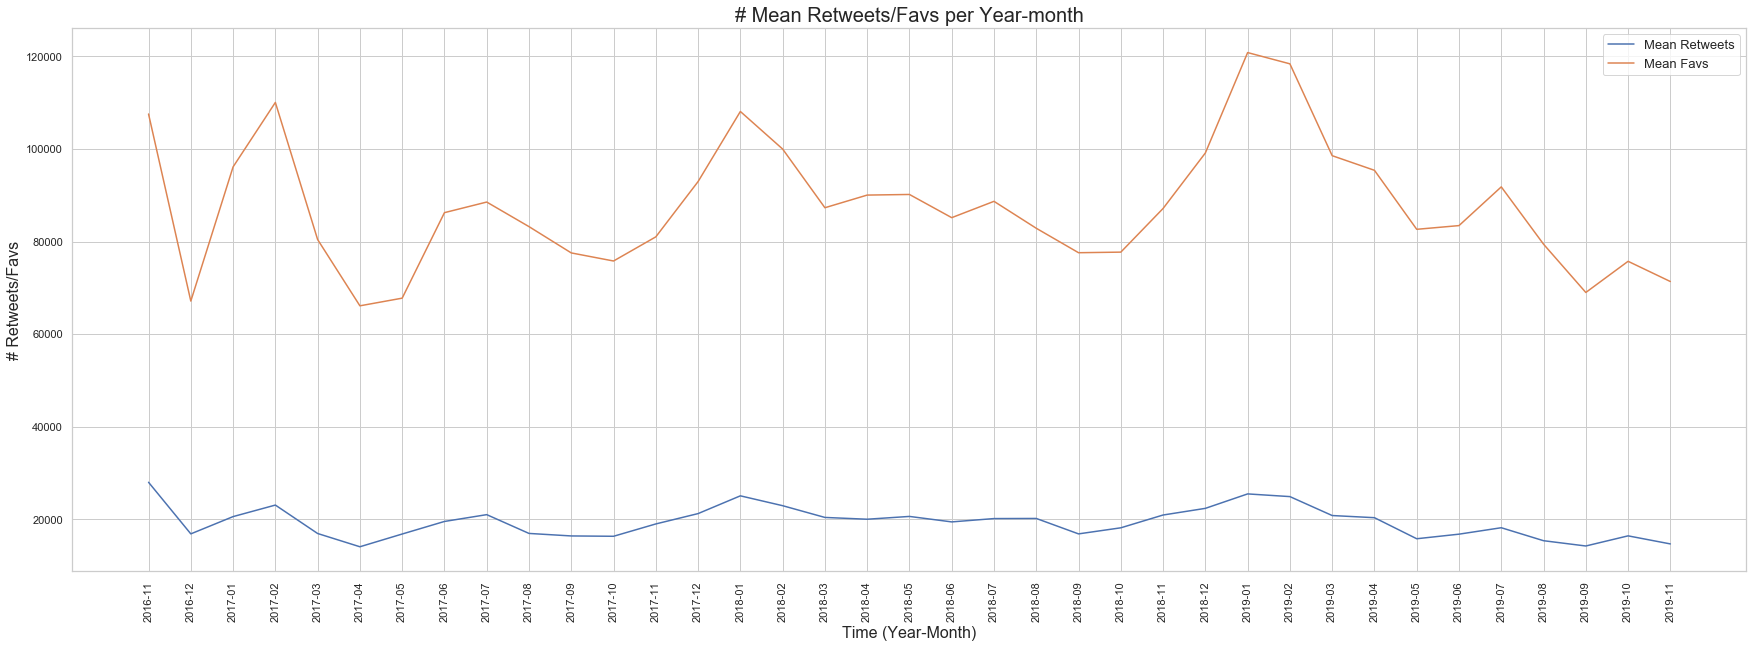

In [20]:
plt.figure(figsize = (30,10))
plt.ylabel("# Retweets/Favs", fontsize = 16)
plt.xlabel("Time (Year-Month)", fontsize = 16)
plt.xticks(rotation='vertical')
plt.title('# Mean Retweets/Favs per Year-month', fontsize = 20)
plt.plot(list (x_retweetcount.mean().index), list(x_retweetcount.mean()["retweet_count"]), label="Mean Retweets" )
plt.plot(list (x_favcount.mean().index), list(x_favcount.mean()["favorite_count"]), label ="Mean Favs" )
plt.legend(fontsize = 13)
plt.show();

*EDA Analysis*

- Both retweets and favs follow the same frequency pattern.

- However, the dimensions are different: favs are far more frequent than retweets. This result was expected as people are more likely to fav a tweet than to retweet it.

##### 2.2.6 Analyze Tweets Length.

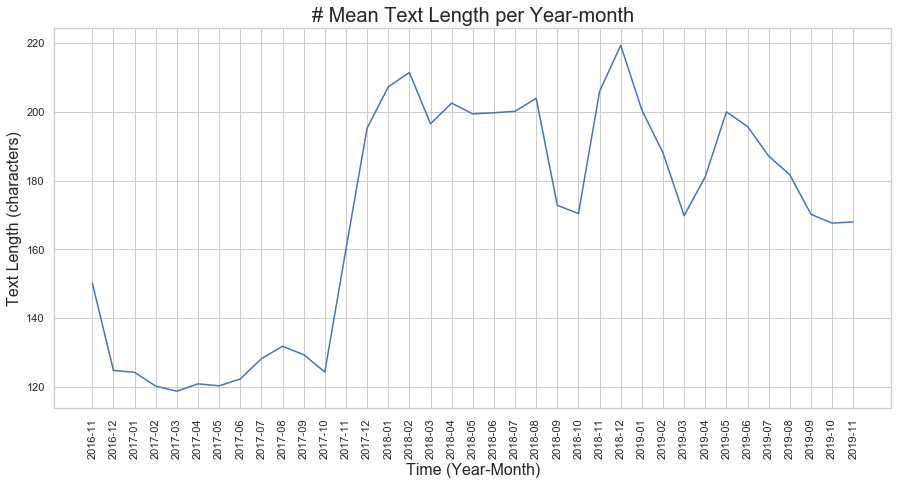

In [13]:
tweets_president_df['text_length'] = tweets_president_df.apply(lambda x: len(x['text']), axis=1)
x_tweetslength = tweets_president_df[tweets_president_df['is_retweet']==False].groupby([tweets_president_df['created_at_month_year']])

plt.figure(figsize = (15,7))
plt.ylabel("Text Length (characters)", fontsize = 16)
plt.xlabel("Time (Year-Month)", fontsize = 16)
plt.xticks(rotation='vertical')
plt.title('# Mean Text Length per Year-month', fontsize = 20)
plt.plot(list (x_tweetslength.mean().index), list(x_tweetslength.mean()["text_length"]) )
#plt.legend(fontsize = 13)
plt.show();

#In 2017-11 Twitter doubled the # of max characters.

*EDA Analysis*

- The thing that most caught our attention was the increase of text length between October and November 2017. We researched and found that, in November 2017, Twitter increaded the characters limit from 140 to 280 characters. This event explained that huge change.

- Other thing that would be interesting to analyze is what happened in September and October 2018 and March 2019, as Trump's tweets were shorter in those months.

- We only consider Trump's tweets for this analysis.

##### 2.2.7 Proportion of Retweeted Tweets/Total Tweets (Original + Retweets)

In [22]:
#tweets_president_df[tweets_president_df['id_str'].isna()]['id_str'] = tweets_president_df['is_retweet']
tweets_president_df['id_str'].fillna(tweets_president_df['is_retweet'], inplace = True)

In [26]:
tweets_president_df.loc[(tweets_president_df['is_retweet']>1), 'is_retweet'] = 0
tweets_president_df.head()
tweets_president_df[tweets_president_df['is_retweet'] == False].head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,president,created_at_hour,created_at_date,created_at_month,created_at_year,created_at_month_year
0,Twitter for iPhone,"Wow! Was just told that my son’s book, “Trigge...",2019-11-14 03:47:12,23179,137637,False,1194824072011689984,1,03,11/14/19,11,2019,2019-11
13,Twitter for iPhone,Thank you @FranklinGraham. It is a time of “sh...,2019-11-14 03:32:36,12175,46496,False,1194820401035120128,1,03,11/14/19,11,2019,2019-11
30,Twitter Media Studio,https://t.co/FJ8gMdh5bX,2019-11-13 16:50:37,19497,57273,False,1194658838315719936,1,16,11/13/19,11,2019,2019-11
42,Twitter for iPhone,READ THE TRANSCRIPT!,2019-11-13 13:30:55,23022,109196,False,1194608581590560000,1,13,11/13/19,11,2019,2019-11
43,Twitter for iPhone,NEVER TRUMPERS!,2019-11-13 13:30:31,12611,64402,False,1194608482793789952,1,13,11/13/19,11,2019,2019-11


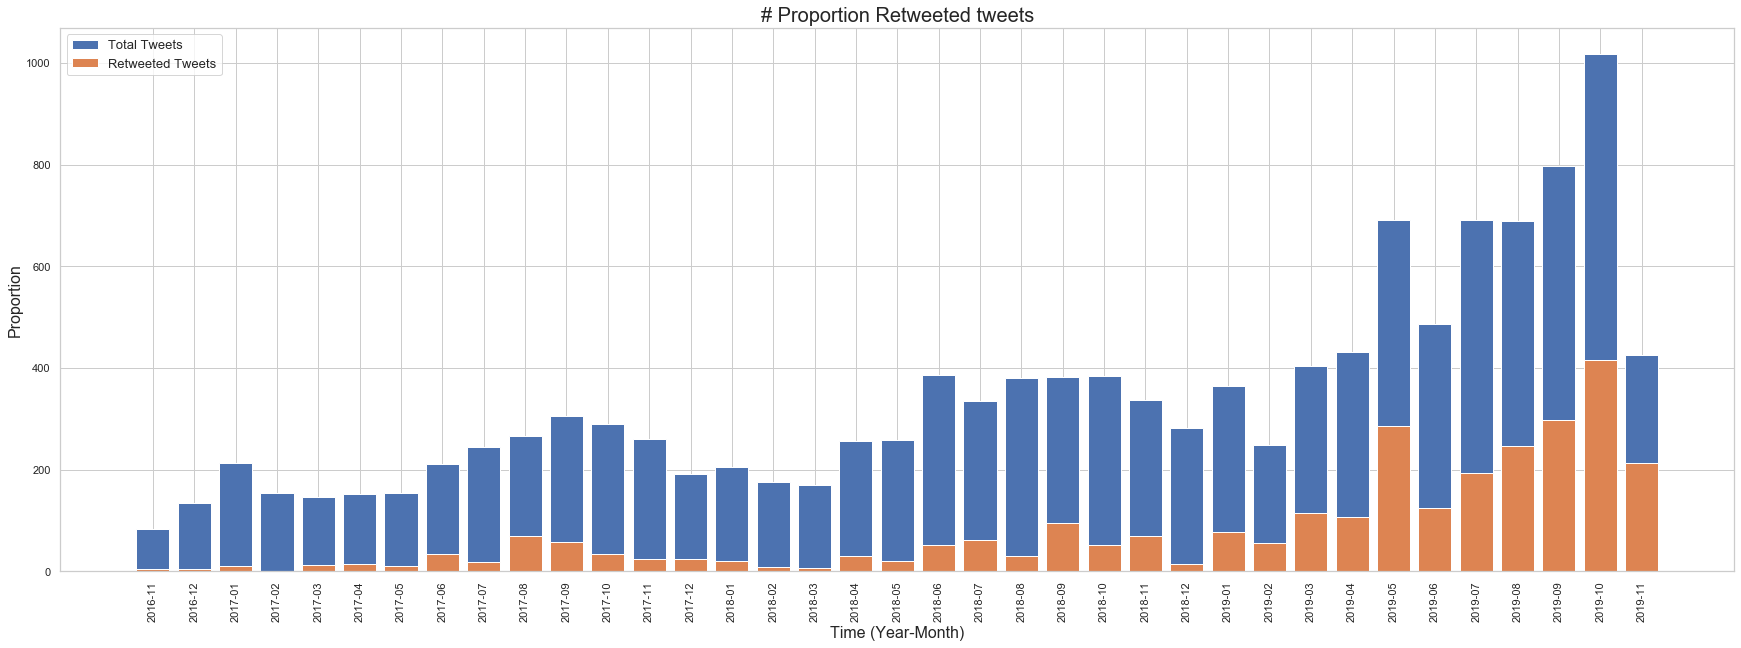

In [21]:
x_tweets = tweets_president_df.groupby([tweets_president_df['created_at_month_year']])

plt.figure(figsize = (30,10))
plt.ylabel("Proportion", fontsize = 16)
plt.xlabel("Time (Year-Month)", fontsize = 16)
plt.xticks(rotation='vertical')
plt.title('# Proportion Retweeted tweets', fontsize = 20)
plt.bar(list (x_tweets.count().index),
        list(x_tweets.count()["created_at"]), label="Total Tweets")
plt.bar(list (x_tweets.count().index), 
        list(x_tweets.sum()["is_retweet"]), label="Retweeted Tweets")
plt.legend(fontsize = 13)
plt.show();


*EDA Analysis*

- There is an increase in the proportions of retweets tweets among his tweets.

- Trump's tendency to retweet could explain in a great way the important increase in his tweets the last year. 

- It would be interesting to redo the previous analysis considering only Trump's tweets without the retweets.

##### 2.2.8 Proportion of Tweets from different platforms

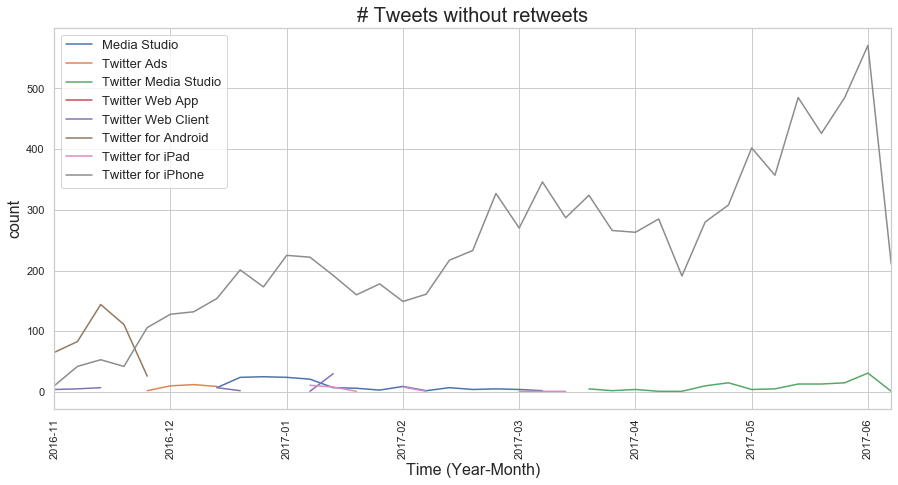

In [52]:
#https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html
plot_sources = tweets_president_df[tweets_president_df['is_retweet'] == False].groupby(['created_at_month_year','source'])['president'].sum().unstack().plot(figsize=(15,7))                                                                                                  
plot_sources.set_ylabel("count", fontsize = 16)
plot_sources.set_xlabel("Time (Year-Month)", fontsize = 16)
plot_sources.set_xticklabels(labels=list(tweets_president_df[tweets_president_df['is_retweet'] == False].groupby(["created_at_month_year"]).count().index), rotation='vertical')
plot_sources.set_title('# Tweets without retweets', fontsize = 20)
plot_sources.legend(fontsize = 13)
plot_sources;

*EDA Analysis*

- Most of Trump's tweets come from Twitter for iPhone.

- Nevertheless, it would be interesting to analyze the difference of the tweets' polarity and subjectivity levels depending on the source.

# Sentiment Analysis of Tweets

In [18]:
tweets = pd.read_csv('data/tweets_v1.csv')

# Convert is_retweet to boolean instead of string values
tweets['is_retweet'] = tweets['is_retweet'] == 'TRUE'
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

electionDate = datetime.date(2016, 11, 9)
tweets = tweets[tweets['created_at'] >= electionDate]

tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,"Wow! Was just told that my son’s book, “Trigge...",2019-11-14 03:47:00,23179,137637,False,1.194824e+18
1,Twitter for iPhone,RT @Scavino45: After the call - Ambassador Tay...,2019-11-14 03:39:00,8282,0,True,1.194822e+18
2,Twitter for iPhone,RT @Jim_Jordan: Mr. Kent affirmed Ukraine has ...,2019-11-14 03:38:00,16559,0,True,1.194822e+18
3,Twitter for iPhone,RT @Jim_Jordan: https://t.co/zODJMgmP5F,2019-11-14 03:38:00,12576,0,True,1.194822e+18
4,Twitter for iPhone,RT @Scavino45: Moments ago.... https://t.co/XI...,2019-11-14 03:38:00,5148,0,True,1.194822e+18


In [29]:
'''
# WARNING: This commented code takes about 7 minutes to run.
# Instead, just read in the CSV files.

# Create dataframes to store word and count
allWordsDF = pd.DataFrame(columns = ['Count'])
tweetWordsDF = pd.DataFrame(columns = ['Count'])
retweetWordsDF = pd.DataFrame(columns = ['Count'])

# Go over every word in every tweet and record the counts
for i1 in range(len(tweets)):
    row = tweets.iloc[i1]
    text = row.text
    blob = TextBlob(text)
    
    for word in blob.words:
        word = word.lower()
        
        # Overall counts
        if word not in allWordsDF.index:
            allWordsDF.loc[word] = 0
        allWordsDF.loc[word] += 1
        
        # Tweet vs. retweet counts
        if row.is_retweet:
            if word not in retweetWordsDF.index:
                retweetWordsDF.loc[word] = 0
            retweetWordsDF.loc[word] += 1
        else:
            if word not in tweetWordsDF.index:
                tweetWordsDF.loc[word] = 0
            tweetWordsDF.loc[word] += 1
            
# Save the counts to CSV files to save time later
allWordsDF.to_csv('data/all_word_counts.csv')
tweetWordsDF.to_csv('data/tweet_word_counts.csv')
retweetWordsDF.to_csv('data/retweet_word_counts.csv')

'''
# Words to ignore is the top 30 used words in english and a few other special characters
ignoreWords = [
    'the',
    'of',
    'and',
    'a',
    'to',
    'in',
    'is',
    'you',
    'that',
    'it',
    'he',
    'was',
    'for',
    'on',
    'are',
    'as',
    'with',
    'his',
    'they',
    'i',
    'at',
    'be',
    'this',
    'have',
    'from',
    'or',
    'one',
    'had',
    'by',
    'word',
    '’',
    '\'s',
    '“',
    '”',
    'http',
    'https',
    'rt',
    'n\'t',
    'amp', # from &amp;
    't',
    's'
]

# Read in pre-saved word count csv files so we don't have to take forever to compute it every time
allWordsDF = pd.read_csv('data/all_word_counts.csv', names = ['word', 'count'], skiprows = [0])
tweetWordsDF = pd.read_csv('data/tweet_word_counts.csv', names = ['word', 'count'], skiprows = [0])
retweetWordsDF = pd.read_csv('data/retweet_word_counts.csv', names = ['word', 'count'], skiprows = [0])
#allWordsDF.head()

Text(0.5, 1.0, 'Top 15 Words in All Trump Tweets/Retweets Since Nov. 9 2016 (ignoring most common 30 words in English)')

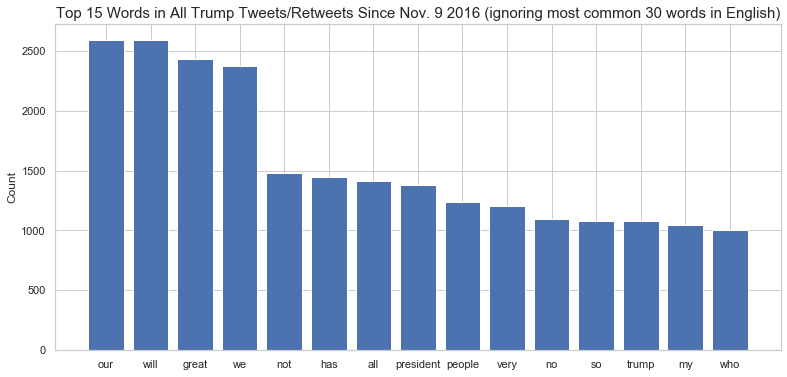

In [45]:
plt.figure(figsize=(13, 6))
topWords = allWordsDF[~allWordsDF.word.isin(ignoreWords)].sort_values('count', ascending = False).head(15)
plt.bar(topWords['word'], topWords['count'])
plt.ylabel('Count', fontsize=12)
plt.title('Top 15 Words in All Trump Tweets/Retweets Since Nov. 9 2016 (ignoring most common 30 words in English)', fontsize=15)

Text(0.5, 1.0, 'Top 15 Words in Trump Tweets Since Nov. 9 2016 (ignoring most common 30 words in English)')

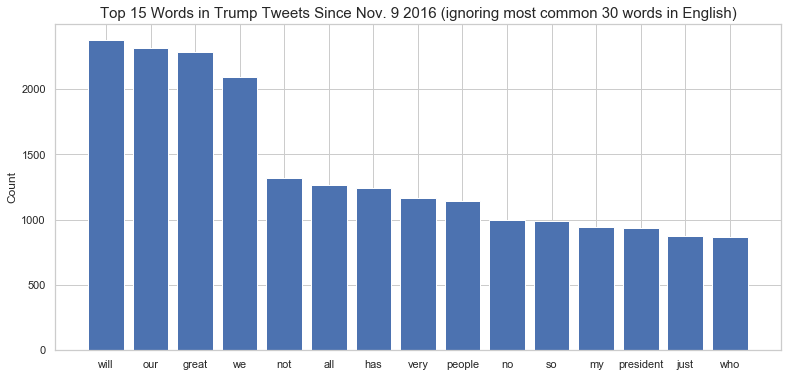

In [47]:
plt.figure(figsize=(13, 6))
topWords = tweetWordsDF[~tweetWordsDF.word.isin(ignoreWords)].sort_values('count', ascending = False).head(15)
plt.bar(topWords['word'], topWords['count'])
plt.ylabel('Count')
plt.title('Top 15 Words in Trump Tweets Since Nov. 9 2016 (ignoring most common 30 words in English)', fontsize = 15)

Text(0.5, 1.0, 'Top 15 Words in Trump Retweets Since Nov. 9 2016 (ignoring most common 30 words in English)')

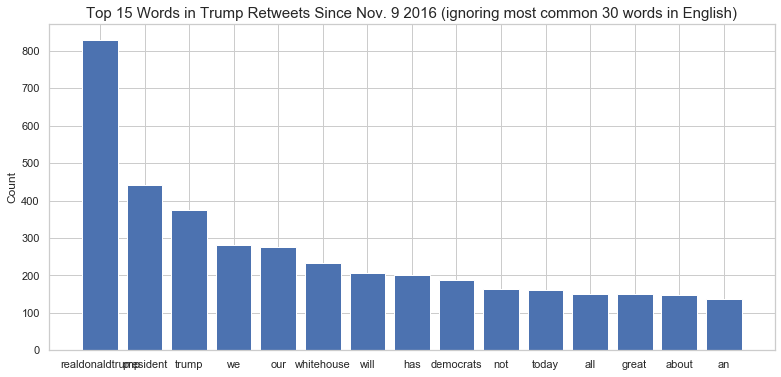

In [48]:
plt.figure(figsize=(13, 6))
topWords = retweetWordsDF[~retweetWordsDF.word.isin(ignoreWords)].sort_values('count', ascending = False).head(15)
plt.bar(topWords['word'], topWords['count'])
plt.ylabel('Count')
plt.title('Top 15 Words in Trump Retweets Since Nov. 9 2016 (ignoring most common 30 words in English)', fontsize = 15)

In [23]:
'''
# WARNING: This code takes a long time to run, since we have to calculate
# the sentiment scores for each tweet individually. Much faster to read in
# csv file with scores already computed.

tweets = pd.read_csv('tweets_v1.csv')
display(tweets.head())

# Convert is_retweet to boolean instead of string values
tweets['is_retweet'] = tweets['is_retweet'] == 'TRUE'

display(tweets.head())

polarityVals = np.zeros((len(tweets), 1))
subjectivityVals = np.zeros((len(tweets), 1))

for i1 in range(len(tweets)):
    # Convert tweet text to TextBlob object
    text = tweets.iloc[i1]['text']
    blob = TextBlob(text)
    
    # Get polarity and subjectivity of tweet
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Store polarity and subjectivity
    polarityVals[i1, 0] = polarity
    subjectivityVals[i1, 0] = subjectivity

# Put the polarity and subjectivity values in the data frame
tweets['polarity'] = polarityVals
tweets['subjectivity'] = subjectivityVals

tweets.head()

# Save to csv for easy access later
tweets.to_csv('tweets_with_sentiment.csv')
'''

tweets = pd.read_csv('data/tweets_with_sentiment.csv', index_col = 0)
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

electionDate = datetime.date(2016, 11, 9)
tweets = tweets[tweets['created_at'] >= electionDate]

tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity
0,Twitter for iPhone,"Wow! Was just told that my son’s book, “Trigge...",2019-11-14 03:47:00,23179,137637,False,1.194824e+18,0.147727,0.727273
1,Twitter for iPhone,RT @Scavino45: After the call - Ambassador Tay...,2019-11-14 03:39:00,8282,0,True,1.194822e+18,0.000000,0.000000
2,Twitter for iPhone,RT @Jim_Jordan: Mr. Kent affirmed Ukraine has ...,2019-11-14 03:38:00,16559,0,True,1.194822e+18,-0.500000,0.500000
3,Twitter for iPhone,RT @Jim_Jordan: https://t.co/zODJMgmP5F,2019-11-14 03:38:00,12576,0,True,1.194822e+18,0.000000,0.000000
4,Twitter for iPhone,RT @Scavino45: Moments ago.... https://t.co/XI...,2019-11-14 03:38:00,5148,0,True,1.194822e+18,0.000000,0.000000


In [24]:
# Split data into tweets and retweets
trumpTweets = tweets[tweets['is_retweet'] == False]
trumpRetweets = tweets[tweets['is_retweet'] == True]

Text(0.5, 1.0, 'Distribution of Subjectivity Scores since Election')

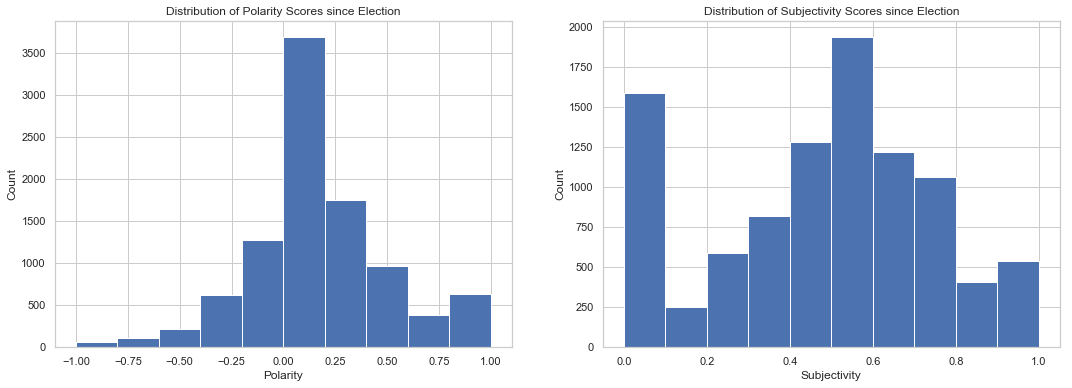

In [25]:
# Histogram of distribution of polarity and subjectivity scores
plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
plt.hist(trumpTweets['polarity'])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Polarity Scores since Election')

plt.subplot(1, 2, 2)
plt.hist(trumpTweets['subjectivity'])
plt.xlabel('Subjectivity')
plt.ylabel('Count')
plt.title('Distribution of Subjectivity Scores since Election')

In [26]:
print('Tweets with high polarity (+1):')
for i1 in range(5):
    print(i1 + 1, trumpTweets[trumpTweets['polarity'] == 1]['text'].iloc[i1])

Tweets with high polarity (+1):
1 Read the Transcript. It is PERFECT!
2 Today, we come together as one Nation to salute the Veterans of the United States Armed Forces – the greatest warriors ever to walk on the face of the Earth. Our Veterans risked everything for us. Now, it is our duty to serve and protect THEM every day of our lives! https://t.co/vC3UGvWF9S
3 HAPPY VETERANS DAY!
4 Make America Great Again! https://t.co/ffS9kLtjxE
5 Great! https://t.co/QlLjEHUR0G


In [27]:
print('Tweets with low polarity (-1):')
for i1 in range(5):
    print(i1 + 1, trumpTweets[trumpTweets['polarity'] == -1]['text'].iloc[i1])

Tweets with low polarity (-1):
1 It never ends. The Do Nothing Dems are terrible! https://t.co/l7Qk0WU8ML
2 The Amazon Washington Post did a story that I brought racist attacks against the “Squad.” No, they brought racist attacks against our Nation. All I do is call them out for the horrible things they have said. The Democrats have become the Party of the Squad!
3 Representatives Omar and Tlaib are the face of the Democrat Party, and they HATE Israel!
4 So terrible! https://t.co/L9lqQIGAUp
5 BORING!


In [28]:
print('Tweets with high subjectivity (+1):')
for i1 in range(5):
    print(i1 + 1, trumpTweets[trumpTweets['subjectivity'] == 1]['text'].iloc[i1])

Tweets with high subjectivity (+1):
1 “This ridiculous Impeachment is a travesty, it’s not an inquiry. Just read the transcript.” @LouDobbs
2 Read the Transcript. It is PERFECT!
3 Today, we come together as one Nation to salute the Veterans of the United States Armed Forces – the greatest warriors ever to walk on the face of the Earth. Our Veterans risked everything for us. Now, it is our duty to serve and protect THEM every day of our lives! https://t.co/vC3UGvWF9S
4 Shifty Adam Schiff will only release doctored transcripts. We haven’t even seen the documents and are restricted from (get this) having a lawyer. Republicans should put out their own transcripts! Schiff must testify as to why he MADE UP a statement from me, and read it to all!
5 HAPPY VETERANS DAY!


In [29]:
print('Tweets with low subjectivity (0):')
for i1 in range(5):
    print(i1 + 1, trumpTweets[trumpTweets['subjectivity'] == 0]['text'].iloc[i1])

Tweets with low subjectivity (0):
1 https://t.co/FJ8gMdh5bX
2 READ THE TRANSCRIPT!
3 NEVER TRUMPERS!
4 The Democrats have stacked the deck against President Trump and the Republicans. They have leaked out everything. @SteveDoocy @foxandfriends
5 Economy is BOOMING. Seems set to have yet another record day!


<hr style='height:2pt'>

# Predicting the impact of measurable emotions in tweets on two key 'social approval indicators': Favorites and Followers

## 1. Predict favorite_count

In [53]:
def encodeCategorical(df, variables):
    dummies = pd.get_dummies(df[variables], drop_first = True)
    df[dummies.columns] = dummies

In [121]:
# Generate data for this section
tweets_df = pd.read_excel("data/2012-2019.xlsx")

# Only get tweets from after election and tweeted by trump
electionDate = datetime.date(2016, 11, 9)
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df = tweets_df[(tweets_df['created_at'] > electionDate) & (tweets_df['is_retweet'] == False)]
tweets_df.drop('is_retweet', axis = 1, inplace = True)

# Parse out year, month, hour, and weekday from the date
tweets_df['created_at_year'] = tweets_df['created_at'].dt.year
tweets_df['created_at_month'] = tweets_df['created_at'].dt.month
tweets_df['created_at_hour'] = tweets_df['created_at'].dt.hour
tweets_df['created_at_weekday'] = tweets_df['created_at'].dt.weekday

# Get length of tweet
tweets_df['text_length'] = tweets_df['text'].str.len()

# Encode source, year, month, hour, and weekday as one hot encoding
vs = ['source', 'created_at_year', 'created_at_month', 'created_at_hour', 'created_at_weekday']
tweets_df[vs] = tweets_df[vs].astype(str)
encodeCategorical(tweets_df, vs)

# Calculate polarity and subjectivity scores for the tweets
polarityVals = np.zeros((len(tweets_df), 1))
subjectivityVals = np.zeros((len(tweets_df), 1))
for i1 in range(len(tweets_df)):
    # Convert tweet text to TextBlob object
    text = tweets_df.iloc[i1]['text']
    blob = TextBlob(text)
    
    # Get polarity and subjectivity of tweet
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    # Store polarity and subjectivity
    polarityVals[i1, 0] = polarity
    subjectivityVals[i1, 0] = subjectivity

# Put the polarity and subjectivity values in the data frame
tweets_df['polarity'] = polarityVals
tweets_df['subjectivity'] = subjectivityVals

# Drop columns we don't need
tweets_df.drop(vs + ['text', 'created_at', 'retweet_count', 'id_str'], axis = 1, inplace = True)

# Save to CSV
tweets_df.to_csv('data/final_data_v1.csv')

In [6]:
final_df = pd.read_csv('data/final_data_v1.csv', index_col = 0)

In [7]:
#Check Correlation with parameters
cor = final_df.corr()

#Correlation with output variable
cor_target = abs(cor["favorite_count"])

#Selecting highly correlated features
relevant_features = cor_target.sort_values(ascending=False).iloc[1:8,]
relevant_features

created_at_month_2            0.127949
created_at_month_9            0.102932
created_at_weekday_6          0.094112
created_at_month_10           0.086581
subjectivity                  0.083100
text_length                   0.080192
source_Twitter for Android    0.066464
Name: favorite_count, dtype: float64

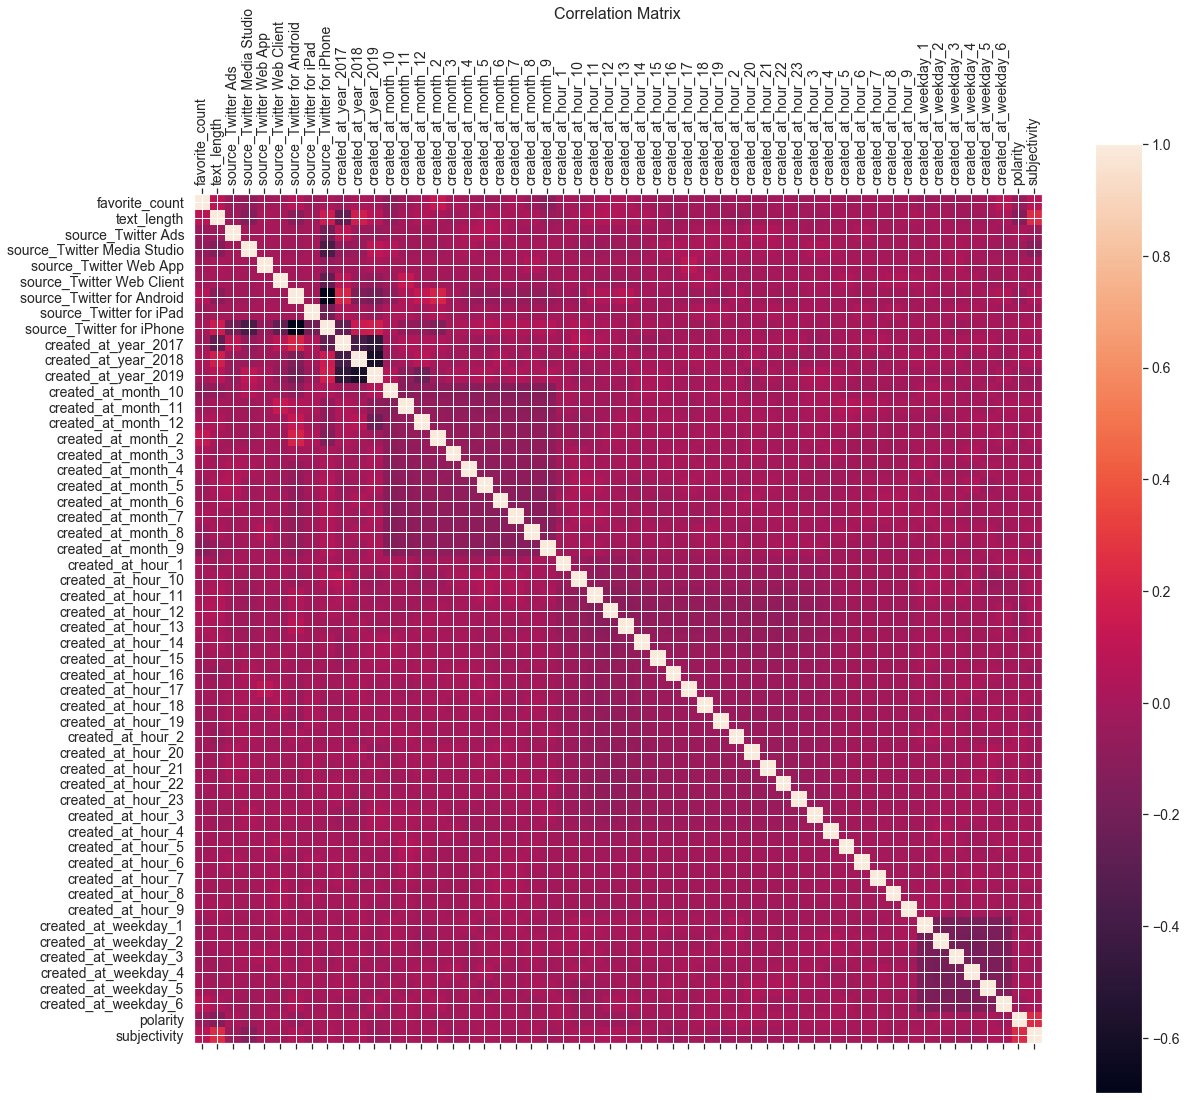

In [8]:
#Plot
f = plt.figure(figsize=(19, 17))
plt.matshow(cor, fignum=f.number)
plt.xticks(range(final_df.shape[1]), final_df.columns, fontsize=14, rotation=90)
plt.yticks(range(final_df.shape[1]), final_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', y=1.2, fontsize=16);
plt.savefig('images/m1_correlation.png')
plt.show()

In [9]:
#Other Correlation graph
#corr = final_df.corr()
#corr.style.background_gradient(cmap='wcoolwarm').set_precision(2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(final_df.loc[:, final_df.columns != 'favorite_count'], 
                                                                   final_df.favorite_count, test_size=0.2, 
                                                                   random_state = 42)
X_train.shape

(7761, 53)

In [11]:
#Model 1: linear
X_train_cst = sm.add_constant(X_train.values)
X_test_cst = sm.add_constant(X_test.values)

model1_lm = sm.OLS(y_train, X_train_cst).fit()

model1_lm_pred = model1_lm.predict(X_test_cst)
rmse_model1_lm = sqrt(mean_squared_error(y_test, model1_lm_pred))
r2_model1_lm = r2_score(y_test,model1_lm_pred)
print('RMSE Linear Regression:', round(rmse_model1_lm,2))
print('R2 Linear Regression model:', round(r2_model1_lm,2))

# Try the model without polarity or subjectivity and see how well it does
X_train_no_sentiment = X_train.drop(['polarity', 'subjectivity'], axis = 1)
X_train_no_sentiment_c = sm.add_constant(X_train_no_sentiment)
X_test_no_sentiment = X_test.drop(['polarity', 'subjectivity'], axis = 1)
X_test_no_sentiment_c = sm.add_constant(X_test_no_sentiment)

model1_lm_no_sentiment = sm.OLS(y_train, X_train_no_sentiment_c).fit()
model1_lm_no_sentiment_pred = model1_lm_no_sentiment.predict(X_test_no_sentiment_c)
rmse_model1_lm_no_sentiment = sqrt(mean_squared_error(y_test, model1_lm_no_sentiment_pred))
r2_model1_lm_no_sentiment = r2_score(y_test,model1_lm_pred)
print()
print('Discarding sentiment scores:')
print('RMSE Linear Regression:', round(rmse_model1_lm_no_sentiment,2))
print('R2 Linear Regression model:', round(r2_model1_lm_no_sentiment,2))

RMSE Linear Regression: 46136.56
R2 Linear Regression model: 0.07

Discarding sentiment scores:
RMSE Linear Regression: 46269.79
R2 Linear Regression model: 0.07


In [12]:
#Model 2: XGB
import xgboost as xgb

# Create the training and test data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

param = {'max_depth': 3,           # the maximum depth of each tree
         'eta':       0.4,         # the training step for each iteration
         'silent':    1,           # logging mode - quiet
         'objective': 'reg:squarederror'} 

# the number of training iterations
num_round = 200  

bst = xgb.train(param, 
                dtrain, 
                num_round, 
                evals= [(dtrain, 'train')], 
                early_stopping_rounds=20,
                verbose_eval=False)

pred_model2_xgb  = bst.predict(dtest)
#Performance Evaluation
rmse_model2_xgb = sqrt(mean_squared_error(y_test, pred_model2_xgb))
r2_model2_xgb = r2_score(y_test,pred_model2_xgb)
print('RMSE FNN:', round(rmse_model2_xgb,2))
print('R2 FNN model:', round(r2_model2_xgb,2))

# Try the model without polarity or subjectivity and see how well it does
dtrain_no_sentiment = xgb.DMatrix(X_train_no_sentiment, label = y_train)
dtest_no_sentiment = xgb.DMatrix(X_test_no_sentiment, label = y_test)

bst_no_sentiment = xgb.train(param, 
                dtrain_no_sentiment, 
                num_round, 
                evals= [(dtrain_no_sentiment, 'train')], 
                early_stopping_rounds=20,
                verbose_eval=False)

pred_model2_xgb_no_sentiment = bst_no_sentiment.predict(dtest_no_sentiment)
rmse_model2_xgb_no_sentiment = sqrt(mean_squared_error(y_test, pred_model2_xgb_no_sentiment))
r2_model2_xgb_no_sentiment = r2_score(y_test,pred_model2_xgb_no_sentiment)
print()
print('Discarding sentiment scores:')
print('RMSE FNN:', round(rmse_model2_xgb_no_sentiment,2))
print('R2 FNN model:', round(r2_model2_xgb_no_sentiment,2))

RMSE FNN: 45605.87
R2 FNN model: 0.09

Discarding sentiment scores:
RMSE FNN: 45654.87
R2 FNN model: 0.09


In [13]:
#Model 3: FNN

#Convert pandas series to numpy arrays
X_train_np = X_train.copy().to_numpy()
y_train_np = y_train.copy().to_numpy()
X_test_np  = X_test.copy().to_numpy()
y_test_np  = y_test.copy().to_numpy()

#Setup, train model, save history
model3_fnn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation='relu', input_shape=(53,)),
  tf.keras.layers.Dense(15, activation='relu'),  
  tf.keras.layers.Dense(15, activation='relu'),  
  tf.keras.layers.Dense(1, activation='linear')
])

model3_fnn.compile(loss ='MSE')

history_model3_fnn = model3_fnn.fit(X_train_np,
                                    y_train_np,
                                    validation_data=(X_test_np, y_test_np),
                                    epochs = 150,
                                    batch_size=32,
                                    verbose = 0)
#print(model3_fnn.summary())

#Performance Evaluation
pred_model3_fnn = model3_fnn.predict(X_test_np)
rmse_model3_fnn = sqrt(mean_squared_error(y_test_np, pred_model3_fnn))
r2_model3_fnn = r2_score(y_test_np,pred_model3_fnn)
print('RMSE FNN:', round(rmse_model3_fnn,2))
print('R2 FNN model:', round(r2_model3_fnn,2))

# Try the model without polarity or subjectivity and see how well it does
X_train_np_no_sentiment = X_train_no_sentiment.copy().to_numpy()
X_test_np_no_sentiment = X_test_no_sentiment.copy().to_numpy()

model3_fnn_no_sentiment = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation='relu', input_shape=(51,)),
  tf.keras.layers.Dense(15, activation='relu'),  
  tf.keras.layers.Dense(15, activation='relu'),  
  tf.keras.layers.Dense(1, activation='linear')
])

model3_fnn_no_sentiment.compile(loss ='MSE')

history_model3_fnn = model3_fnn_no_sentiment.fit(X_train_np_no_sentiment,
                                    y_train_np,
                                    validation_data=(X_test_np_no_sentiment, y_test_np),
                                    epochs = 150,
                                    batch_size=32,
                                    verbose = 0) # TODO CHANGE BACK TO 150

pred_model3_fnn_no_sentiment = model3_fnn_no_sentiment.predict(X_test_np_no_sentiment)
rmse_model3_fnn_no_sentiment = sqrt(mean_squared_error(y_test_np, pred_model3_fnn_no_sentiment))
r2_model3_fnn_no_sentiment = r2_score(y_test_np,pred_model3_fnn_no_sentiment)
print()
print('Discarding sentiment scores:')
print('RMSE FNN:', round(rmse_model3_fnn_no_sentiment,2))
print('R2 FNN model:', round(r2_model3_fnn_no_sentiment,2))

RMSE FNN: 46790.65
R2 FNN model: 0.04

Discarding sentiment scores:
RMSE FNN: 46898.75
R2 FNN model: 0.04


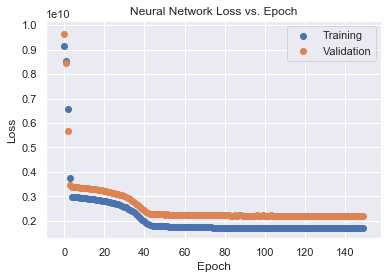

In [14]:
# Plot the loss vs. epoch to see if we are overfit
training_loss = history_model3_fnn.history['loss']
validation_loss = history_model3_fnn.history['val_loss']

x = range(len(training_loss))

plt.scatter(x, training_loss)
plt.scatter(x, validation_loss)
plt.title('Neural Network Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

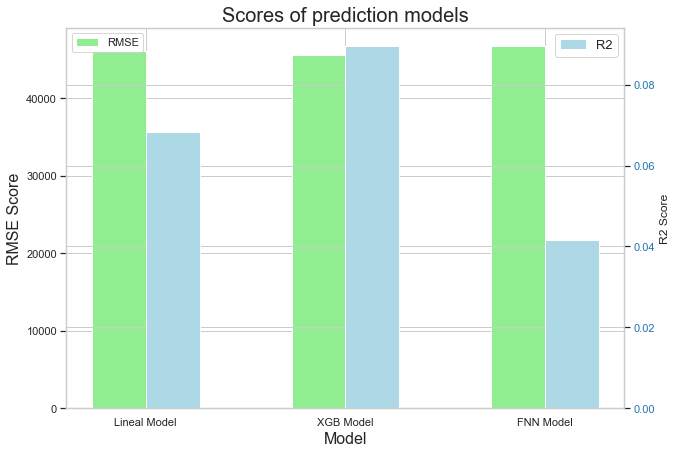

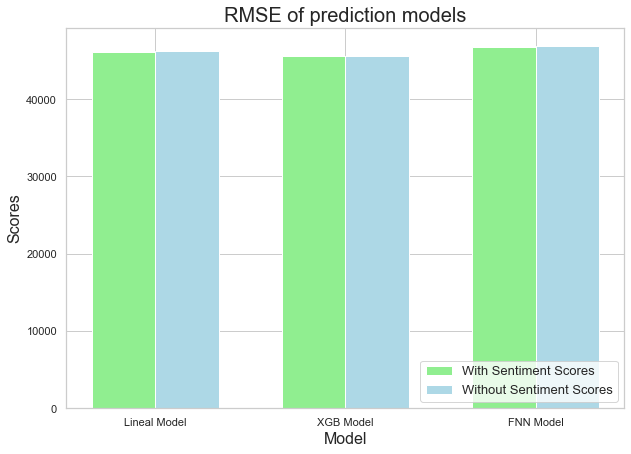

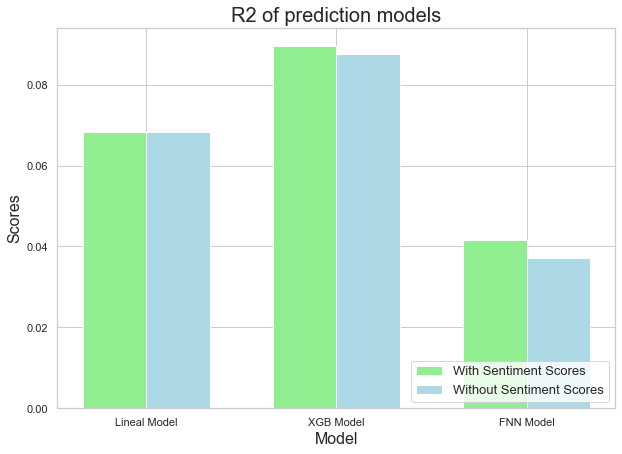

In [20]:
#Plot Metrics BEFORE
metrics = [['Lineal Model', rmse_model1_lm, rmse_model1_lm_no_sentiment, r2_model1_lm, r2_model1_lm_no_sentiment], 
           ['XGB Model', rmse_model2_xgb, rmse_model2_xgb_no_sentiment, r2_model2_xgb, r2_model2_xgb_no_sentiment],
           ['FNN Model', rmse_model3_fnn, rmse_model3_fnn_no_sentiment, r2_model3_fnn, r2_model3_fnn_no_sentiment]] 
metrics_df = pd.DataFrame(metrics, columns = ['model', 'rmse', 'rmse_no_sentiment','r2', 'r2_no_sentiment'])

'''N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10,7))
color = 'tab:red'
ax1.set_xlabel('Model', fontsize = 16)
ax1.set_ylabel('RMSE Score', fontsize = 16)
plt.title('Scores of prediction models', fontsize = 20)
ax1.bar(ind, metrics_df['rmse'], width=width, label="RMSE", color='lightgreen')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score')  # we already handled the x-label with ax1
ax2.bar(ind+width, metrics_df['r2'], width =width, label="R2", color='lightblue')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='best')
plt.xticks(ind+width/2, labels=['Lineal Model', 'XGB Model', 'FNN Model'])
plt.legend(fontsize = 13)
plt.savefig("images/m1_metrics.png")
plt.show()'''


#Plot Metrics BEFORE AND AFTER
indices = range(3)
width = np.min(np.diff(indices))/3

sns.set_style("whitegrid")
plt.figure(figsize = (10,7))
plt.ylabel("Scores", fontsize = 16)
plt.xlabel("Model", fontsize = 16)
plt.title('RMSE of prediction models', fontsize = 20)
plt.bar(indices - width / 2, metrics_df['rmse'], width, color = 'lightgreen')
plt.bar(indices + width / 2, metrics_df['rmse_no_sentiment'], width, color = 'lightblue')
plt.xticks(indices, metrics_df['model'])
plt.legend(['With Sentiment Scores', 'Without Sentiment Scores'], fontsize = 13, loc = 'lower right')
plt.show()

plt.figure(figsize = (10,7))
plt.ylabel("Scores", fontsize = 16)
plt.xlabel("Model", fontsize = 16)
plt.title('R2 of prediction models', fontsize = 20)
plt.bar(indices - width / 2, metrics_df['r2'], width, color="lightgreen")
plt.bar(indices + width / 2, metrics_df['r2_no_sentiment'], width, color="lightblue")
plt.xticks(indices, metrics_df['model'])
plt.legend(['With Sentiment Scores', 'Without Sentiment Scores'], fontsize = 13, loc = 'lower right')
plt.show()



#metrics_df.head()
#indices - width / 2

## 2. Predict change in followers per day

In [128]:
tweets_df = pd.read_csv('data/tweets_with_sentiment.csv', index_col = 0)

# Only keep tweets from presidency and discard retweets
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
electionDate = datetime.date(2016, 11, 9)
tweets_df = tweets_df[(tweets_df['created_at'] > electionDate) & (tweets_df['is_retweet'] == False)]

# Drop columns we don't need
tweets_df.drop(['source', 'retweet_count', 'favorite_count', 'is_retweet', 'id_str'], axis = 1, inplace = True)

# Get text length
tweets_df['text_length'] = tweets_df['text'].str.len()
tweets_df['date'] = tweets_df['created_at'].astype(str).str.split(' ', expand = True)[0]
tweets_df.drop(['text', 'created_at'], axis = 1, inplace = True)

tweets_df.head()

,polarity,subjectivity,text_length,date
0,0.147727,0.727273,125,2019-11-14
13,-0.625000,0.900000,140,2019-11-14
30,0.000000,0.000000,23,2019-11-13
42,0.000000,0.000000,20,2019-11-13
43,0.000000,0.000000,15,2019-11-13


In [129]:
# Aggregate the data by the day
grouped_df = tweets_df.groupby('date')
mean_df = grouped_df.mean()
min_df = grouped_df.min()
max_df = grouped_df.max()

# Combine the mean, min, and max dataframes into one
agg_df = pd.DataFrame()
agg_df['mean_' + mean_df.columns] = mean_df
agg_df['min_' + min_df.columns] = min_df
agg_df['max_' + max_df.columns] = max_df

# Get day of week and month from the date index
date = pd.to_datetime(agg_df.index)
agg_df['weekday'] = date.weekday.astype(str)
agg_df['month'] = date.month.astype(str)

# Generate one hot encoding values for weekday and month
dummies = pd.get_dummies(agg_df[['weekday', 'month']], drop_first = True)
agg_df[dummies.columns] = dummies
agg_df.drop(['weekday', 'month'], axis = 1, inplace = True)

agg_df.head()

,mean_polarity,mean_subjectivity,mean_text_length,min_polarity,min_subjectivity,min_text_length,max_polarity,max_subjectivity,max_text_length,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-09,0.225000,0.416667,109.00,0.00,0.000000,78,0.450,0.833333,140,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-11-10,1.000000,1.000000,99.00,1.00,1.000000,99,1.000,1.000000,99,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-11-11,0.258966,0.499970,131.20,0.00,0.000000,123,0.580,0.676667,138,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-11-12,0.850000,0.487500,106.00,0.85,0.487500,106,0.850,0.487500,106,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2016-11-13,0.289256,0.599554,113.75,-0.70,0.429762,60,0.925,0.773333,139,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [130]:
# Read in followers per day and calculate percent change
follower_df = pd.read_csv('data/trump_follower_count.csv', index_col = 'date')

# Calculate percent change in followers for that day
follower_df['followers_percent_change'] = 100 * follower_df['followers_change'] / (follower_df['followers'] - follower_df['followers_change'])
follower_df.head()

,followers,followers_change,tweets,tweets_change,followers_percent_change
date,,,,,
2019-12-05,67264902,25777,46637,40,0.038336
2019-12-04,67239125,13874,46597,33,0.020638
2019-12-03,67225251,24159,46564,35,0.035950
2019-12-02,67201092,22689,46529,4,0.033774
2019-12-01,67178403,21364,46525,21,0.031812


In [131]:
# Get the percent change in followers for the next day
nextDay = pd.to_datetime(agg_df.index) + pd.DateOffset(1)
agg_df['next_day_followers_percent_change'] = follower_df.loc[nextDay.astype(str)]['followers_percent_change']

# We get a few days without data for some reason. Only like 20, so not a big deal
agg_df.dropna(inplace = True)

agg_df.head()

,mean_polarity,mean_subjectivity,mean_text_length,min_polarity,min_subjectivity,min_text_length,max_polarity,max_subjectivity,max_text_length,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,next_day_followers_percent_change
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-11-10,1.000000,1.000000,99.00,1.00,1.000000,99,1.000000,1.000000,99,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.026085
2016-11-11,0.258966,0.499970,131.20,0.00,0.000000,123,0.580000,0.676667,138,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1.902960
2016-11-12,0.850000,0.487500,106.00,0.85,0.487500,106,0.850000,0.487500,106,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2.055228
2016-11-13,0.289256,0.599554,113.75,-0.70,0.429762,60,0.925000,0.773333,139,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.941057
2016-11-16,0.159091,0.472803,130.80,0.05,0.312500,109,0.345455,0.550000,140,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.671004


In [132]:
# Save data to CSV
agg_df.to_csv('data/daily_data.csv')

In [73]:
# Upload dataframe
tweets_df = pd.read_csv('data/daily_data.csv', index_col = 0)

# Split dataframe
X_train, X_test, y_train, y_test = train_test_split(tweets_df.loc[:, tweets_df.columns != 'next_day_followers_percent_change'], 
                                                                   tweets_df.next_day_followers_percent_change, test_size=0.2, 
                                                                   random_state = 42)
X_train.shape

(851, 26)

In [74]:
#Check Correlation with parameters
cor = tweets_df.corr()

#Correlation with output variable
cor_target = abs(cor["next_day_followers_percent_change"])

#Selecting highly correlated features
relevant_features = cor_target.sort_values(ascending=False).iloc[1:8,]
relevant_features

max_text_length     0.314477
mean_text_length    0.295269
min_subjectivity    0.187131
month_11            0.144509
mean_polarity       0.136020
min_polarity        0.128654
min_text_length     0.112036
Name: next_day_followers_percent_change, dtype: float64

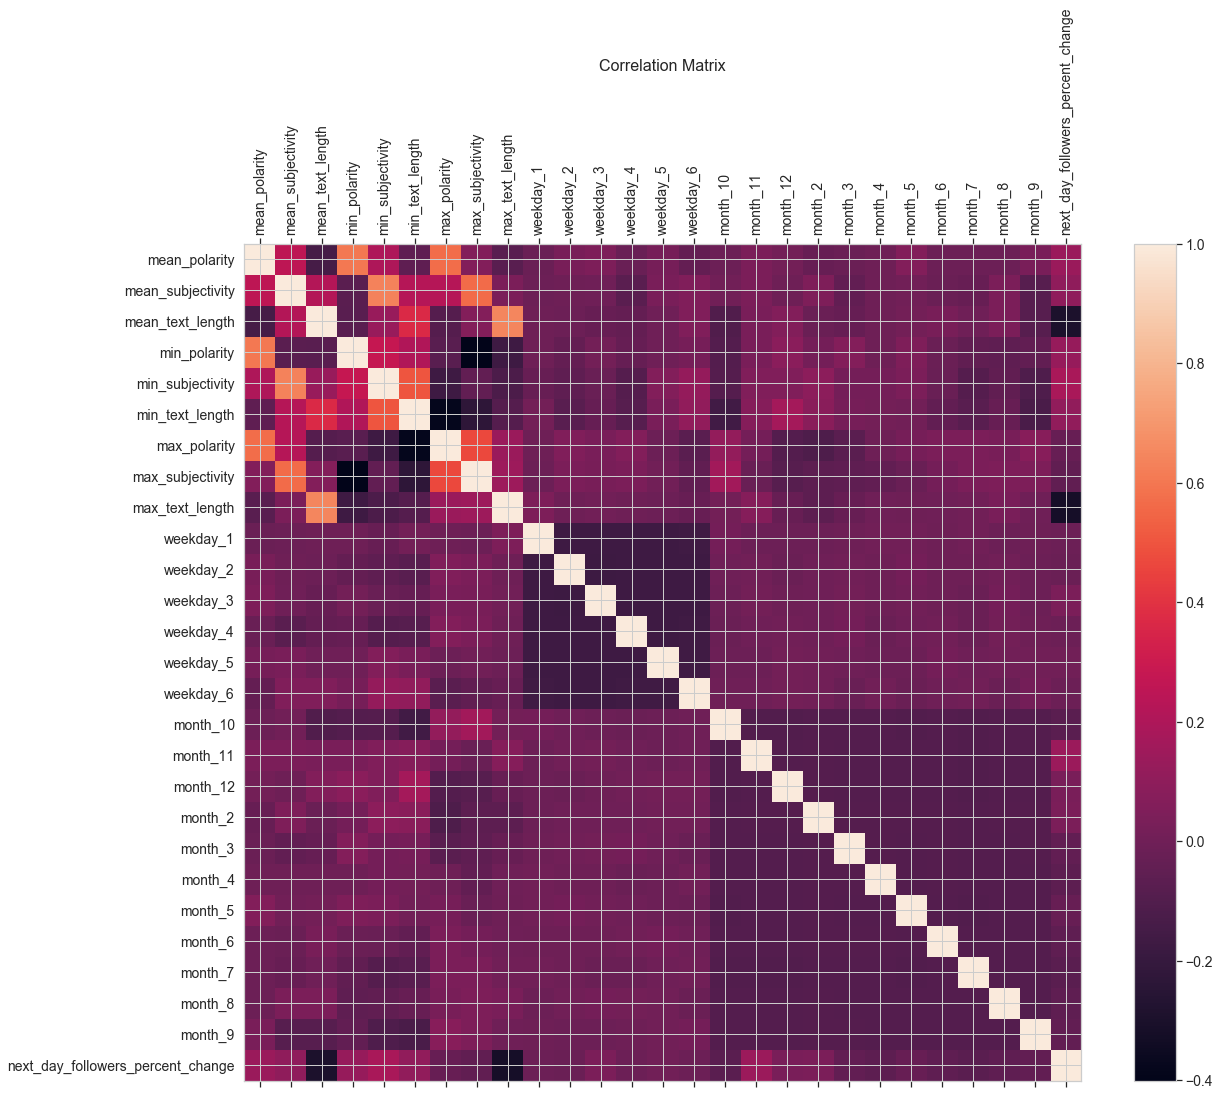

In [75]:
#Plot Correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(cor, fignum=f.number)
plt.xticks(range(tweets_df.shape[1]), tweets_df.columns, fontsize=14, rotation=90)
plt.yticks(range(tweets_df.shape[1]), tweets_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', y=1.2, fontsize=16);
plt.show()

In [88]:
#Model 1: linear
X_train_cst = sm.add_constant(X_train.values)
X_test_cst = sm.add_constant(X_test.values)

model1_lm = sm.OLS(y_train, X_train_cst).fit()

model1_lm_pred = model1_lm.predict(X_test_cst)
rmse_model1_lm = sqrt(mean_squared_error(y_test, model1_lm_pred))
r2_model1_lm = r2_score(y_test,model1_lm_pred)
print('RMSE linear model:', round(rmse_model1_lm,2))
print('R2 linear model:', round(r2_model1_lm, 2))

# Try without sentiment scores
X_train_no_sentiment = X_train.drop(['mean_polarity', 'max_polarity', 'min_polarity', 'mean_subjectivity', 'max_subjectivity', 'min_subjectivity'], axis = 1)
X_train_no_sentiment_c = sm.add_constant(X_train_no_sentiment)
X_test_no_sentiment = X_test.drop(['mean_polarity', 'max_polarity', 'min_polarity', 'mean_subjectivity', 'max_subjectivity', 'min_subjectivity'], axis = 1)
X_test_no_sentiment_c = sm.add_constant(X_test_no_sentiment)

model1_lm_no_sentiment = sm.OLS(y_train, X_train_no_sentiment_c).fit()

model1_lm_pred_no_sentiment = model1_lm_no_sentiment.predict(X_test_no_sentiment_c)
rmse_model1_lm_no_sentiment = sqrt(mean_squared_error(y_test, model1_lm_pred_no_sentiment))
r2_model1_lm_no_sentiment = r2_score(y_test,model1_lm_pred_no_sentiment)
print()
print('Discarding sentiment scores:')
print('RMSE linear model:', round(rmse_model1_lm_no_sentiment,2))
print('R2 linear model:', round(r2_model1_lm_no_sentiment, 2))

RMSE linear model: 0.22
R2 linear model: 0.33

Discarding sentiment scores:
RMSE linear model: 0.22
R2 linear model: 0.31


In [89]:
#Model 2: XGB
import xgboost as xgb

# Create the training and test data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

param = {'max_depth': 3,           # the maximum depth of each tree
         'eta':       0.4,         # the training step for each iteration
         'silent':    1,           # logging mode - quiet
         'objective': 'reg:squarederror'} 

# the number of training iterations
num_round = 200  

bst = xgb.train(param, 
                dtrain, 
                num_round, 
                evals= [(dtrain, 'train')], 
                early_stopping_rounds=20,
                verbose_eval=False)

pred_model2_xgb  = bst.predict(dtest)

#Performance Evaluation
rmse_model2_xgb = sqrt(mean_squared_error(y_test, pred_model2_xgb))
r2_model2_xgb = r2_score(y_test,pred_model2_xgb)
print('RMSE XGB:', round(rmse_model2_xgb,2))
print('R2 XGB model:', round(r2_model2_xgb,2))

# Without sentiment
dtrain_no_sentiment = xgb.DMatrix(X_train_no_sentiment, label = y_train)
dtest_no_sentiment = xgb.DMatrix(X_test_no_sentiment, label = y_test)

bst_no_sentiment = xgb.train(param, 
                dtrain_no_sentiment, 
                num_round, 
                evals= [(dtrain_no_sentiment, 'train')], 
                early_stopping_rounds=20,
                verbose_eval=False)

pred_model2_xgb_no_sentiment = bst_no_sentiment.predict(dtest_no_sentiment)
rmse_model2_xgb_no_sentiment = sqrt(mean_squared_error(y_test, pred_model2_xgb_no_sentiment))
r2_model2_xgb_no_sentiment = r2_score(y_test,pred_model2_xgb_no_sentiment)
print()
print('Discarding sentiment scores:')
print('RMSE XGB:', round(rmse_model2_xgb_no_sentiment,2))
print('R2 XGB model:', round(r2_model2_xgb_no_sentiment,2))

RMSE XGB: 0.21
R2 XGB model: 0.41

Discarding sentiment scores:
RMSE XGB: 0.21
R2 XGB model: 0.38


In [90]:
#Model 3: FNN

#Convert pandas series to numpy arrays
X_train_np = X_train.copy().to_numpy()
y_train_np = y_train.copy().to_numpy()
X_test_np  = X_test.copy().to_numpy()
y_test_np  = y_test.copy().to_numpy()

#Setup, train model, save history
model3_fnn = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation='softplus', input_shape=(26,)),
  tf.keras.layers.Dense(15, activation='softplus'),  
  tf.keras.layers.Dense(15, activation='softplus'),  
  tf.keras.layers.Dense(1, activation='linear')
])

model3_fnn.compile(loss ='MSE')

history_model3_fnn = model3_fnn.fit(X_train_np,
                                    y_train_np,
                                    validation_data=(X_test_np, y_test_np),
                                    epochs = 150,
                                    batch_size=32,
                                    verbose = 0)

#Performance Evaluation
pred_model3_fnn = model3_fnn.predict(X_test_np)
rmse_model3_fnn = sqrt(mean_squared_error(y_test_np, pred_model3_fnn))
r2_model3_fnn = r2_score(y_test_np,pred_model3_fnn)
print('RMSE FNN:', round(rmse_model3_fnn,2))
print('R2 FNN model:', round(r2_model3_fnn,2))

X_train_np_no_sentiment = X_train_no_sentiment.copy().to_numpy()
X_test_np_no_sentiment = X_test_no_sentiment.copy().to_numpy()

model3_fnn_no_sentiment = tf.keras.models.Sequential([
  tf.keras.layers.Dense(15, activation='softplus', input_shape=(20,)),
  tf.keras.layers.Dense(15, activation='softplus'),  
  tf.keras.layers.Dense(15, activation='softplus'),  
  tf.keras.layers.Dense(1, activation='linear')
])

model3_fnn_no_sentiment.compile(loss ='MSE')

history_model3_fnn_no_sentiment = model3_fnn_no_sentiment.fit(X_train_np_no_sentiment,
                                    y_train_np,
                                    validation_data=(X_test_np_no_sentiment, y_test_np),
                                    epochs = 150,
                                    batch_size=32,
                                    verbose = 0)

pred_model3_fnn_no_sentiment = model3_fnn_no_sentiment.predict(X_test_np_no_sentiment)
rmse_model3_fnn_no_sentiment = sqrt(mean_squared_error(y_test_np, pred_model3_fnn_no_sentiment))
r2_model3_fnn_no_sentiment = r2_score(y_test_np,pred_model3_fnn_no_sentiment)
print()
print('Discarding sentiment scores:')
print('RMSE FNN:', round(rmse_model3_fnn_no_sentiment,2))
print('R2 FNN model:', round(r2_model3_fnn_no_sentiment,2))

RMSE FNN: 0.22
R2 FNN model: 0.35

Discarding sentiment scores:
RMSE FNN: 0.23
R2 FNN model: 0.29


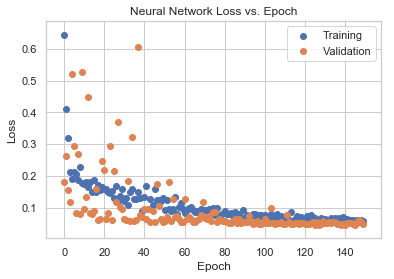

In [97]:
# Plot the loss vs. epoch to see if we are overfit
training_loss = history_model3_fnn.history['loss']
validation_loss = history_model3_fnn.history['val_loss']

x = range(len(training_loss))

plt.scatter(x, training_loss)
plt.scatter(x, validation_loss)
plt.title('Neural Network Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

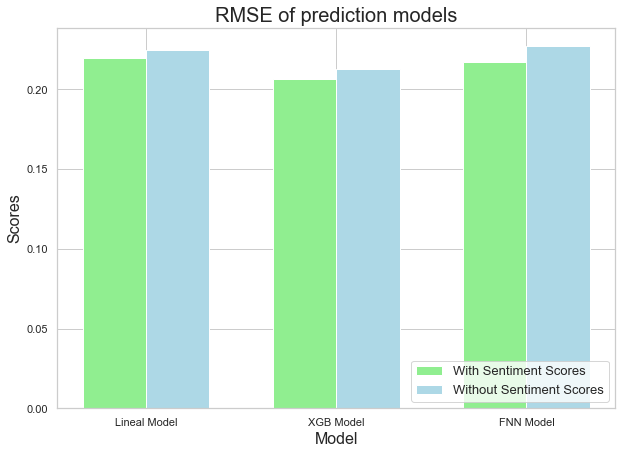

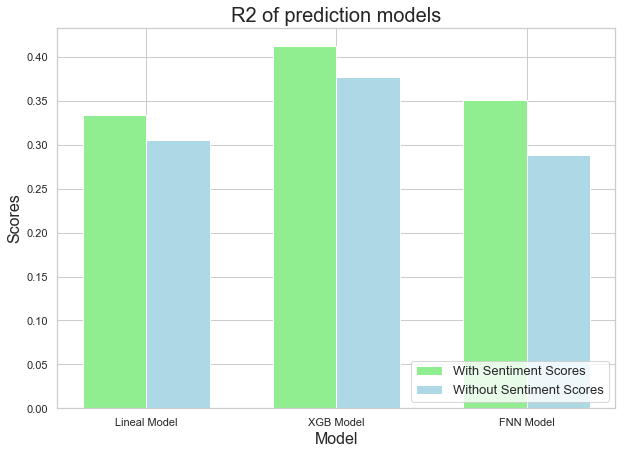

In [92]:
#Plot Metrics
#metrics = [['Lineal Model', rmse_model1_lm, r2_model1_lm], 
#           ['XGB Model', rmse_model2_xgb, r2_model2_xgb],
#           ['FNN Model', rmse_model3_fnn, r2_model3_fnn]] 
#metrics_df = pd.DataFrame(metrics, columns = ['model', 'rmse','r2']) 
metrics = [['Lineal Model', rmse_model1_lm, rmse_model1_lm_no_sentiment, r2_model1_lm, r2_model1_lm_no_sentiment], 
           ['XGB Model', rmse_model2_xgb, rmse_model2_xgb_no_sentiment, r2_model2_xgb, r2_model2_xgb_no_sentiment],
           ['FNN Model', rmse_model3_fnn, rmse_model3_fnn_no_sentiment, r2_model3_fnn, r2_model3_fnn_no_sentiment]] 
metrics_df = pd.DataFrame(metrics, columns = ['model', 'rmse', 'rmse_no_sentiment','r2', 'r2_no_sentiment'])

indices = range(3)
width = np.min(np.diff(indices))/3

'''
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

sns.set_style("whitegrid")
plt.figure(figsize = (10,7))
plt.ylabel("Scores", fontsize = 16)
plt.xlabel("Model", fontsize = 16)
plt.title('Scores of prediction models', fontsize = 20)
plt.bar(ind, metrics_df['rmse'], width=width, label="RMSE", color='lightgreen')
plt.bar(ind+width, metrics_df['r2'], width =width, label="R2" , color='lightblue')
plt.xticks(ind+width/2, labels=['Lineal Model', 'XGB Model', 'FNN Model'])
plt.legend(fontsize = 13)
plt.show()
'''
sns.set_style("whitegrid")
plt.figure(figsize = (10,7))
plt.ylabel("Scores", fontsize = 16)
plt.xlabel("Model", fontsize = 16)
plt.title('RMSE of prediction models', fontsize = 20)
plt.bar(indices - width / 2, metrics_df['rmse'], width, color = 'lightgreen')
plt.bar(indices + width / 2, metrics_df['rmse_no_sentiment'], width, color = 'lightblue')
plt.xticks(indices, metrics_df['model'])
plt.legend(['With Sentiment Scores', 'Without Sentiment Scores'], fontsize = 13, loc = 'lower right')
plt.show()

plt.figure(figsize = (10,7))
plt.ylabel("Scores", fontsize = 16)
plt.xlabel("Model", fontsize = 16)
plt.title('R2 of prediction models', fontsize = 20)
plt.bar(indices - width / 2, metrics_df['r2'], width, color="lightgreen")
plt.bar(indices + width / 2, metrics_df['r2_no_sentiment'], width, color="lightblue")
plt.xticks(indices, metrics_df['model'])
plt.legend(['With Sentiment Scores', 'Without Sentiment Scores'], fontsize = 13, loc = 'lower right')
plt.show()

## The End